#Active Learning (superintend) on tree leaves .ipynb

Regarding Active Learn: https://superintendent.readthedocs.io/en/latest/

### Install package 

In [ ]:
!pip install superintendent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 669 kB/s 
     |████████████████████████████████| 3.0 MB 50.2 MB/s 
     |████████████████████████████████| 130 kB 59.1 MB/s 


In [ ]:
!jupyter nbextension enable --py --sys-prefix ipyevents

Enabling notebook extension ipyevents/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [ ]:
!pip install superintendent[tests,examples]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### creating image Dataset 

as a training, i tried of flowers dataset 

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image
from keras.preprocessing.image import load_img
import warnings
  


In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))

## example on icluding 2 images in a string array 
img=Image.open(str(roses[2]))
img1=Image.open(str(roses[5]))
np_img = np.array([img,img1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
### using keras image import  (more compatable )
imgkr = load_img(str(roses[2]))
imgkr1 = load_img(str(roses[7]))
imgkr2 = load_img(str(roses[10]))
np_imgkr = np.array([imgkr,imgkr1,imgkr2])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


In [ ]:
#x = np.array([np.array(Image.open(str(images))) for images in roses]) --- delete 

y= np.array([np.array(load_img(images)) for images in roses],dtype=object)
y

array([array([[[  1,   0,   0],
               [  1,   1,   1],
               [  0,   1,   4],
               ...,
               [152, 145,  57],
               [145, 141,  52],
               [144, 143,  53]],

              [[  1,   0,   0],
               [  0,   0,   2],
               [  6,  10,  13],
               ...,
               [141, 137,  50],
               [142, 142,  54],
               [147, 150,  59]],

              [[  3,   4,   8],
               [  0,   1,   4],
               [ 84,  89,  92],
               ...,
               [132, 132,  46],
               [137, 142,  52],
               [141, 147,  57]],

              ...,

              [[  0,   0,   0],
               [  0,   0,   0],
               [  0,   0,   0],
               ...,
               [ 34,  31,   0],
               [ 32,  28,   0],
               [ 28,  27,   0]],

              [[  0,   0,   0],
               [  0,   0,   0],
               [  0,   0,   0],
               ...,
        

In [ ]:
#### an idea to fix the black images #### it failed 
lib_len = len(roses)
list_toLabel=[]
i=0
while i < lib_len:
  b= Image.fromarray(y[i].astype('uint8'), 'RGB')
  list_toLabel.append(b)
  i=i+1

list_toLabel

[<PIL.Image.Image image mode=RGB size=320x213 at 0x7F996EEEF1D0>,
 <PIL.Image.Image image mode=RGB size=320x250 at 0x7F98FC675810>,
 <PIL.Image.Image image mode=RGB size=500x331 at 0x7F98FC6758D0>,
 <PIL.Image.Image image mode=RGB size=500x333 at 0x7F98FC35D550>,
 <PIL.Image.Image image mode=RGB size=500x333 at 0x7F98FC37CA10>,
 <PIL.Image.Image image mode=RGB size=320x240 at 0x7F98FC37C0D0>,
 <PIL.Image.Image image mode=RGB size=320x250 at 0x7F98FD4247D0>,
 <PIL.Image.Image image mode=RGB size=500x334 at 0x7F98FC675790>,
 <PIL.Image.Image image mode=RGB size=180x240 at 0x7F98FC675950>,
 <PIL.Image.Image image mode=RGB size=320x212 at 0x7F98FC37C890>,
 <PIL.Image.Image image mode=RGB size=500x333 at 0x7F98FC675A10>,
 <PIL.Image.Image image mode=RGB size=500x333 at 0x7F98FC675A90>,
 <PIL.Image.Image image mode=RGB size=180x240 at 0x7F98FC675B10>,
 <PIL.Image.Image image mode=RGB size=500x301 at 0x7F98FC675B90>,
 <PIL.Image.Image image mode=RGB size=240x240 at 0x7F98FC675C10>,
 <PIL.Imag

In [ ]:
print(y.shape)

(641,)


In [ ]:
#print(y)
print(np_imgkr)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x331 at 0x7F98FC36E550>
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334 at 0x7F98FC36E6D0>
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x7F98FC36E510>]


In [ ]:
np_imgkr.shape
np_imgkr

array([<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x331 at 0x7F98FC36E550>,
       <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x334 at 0x7F98FC36E6D0>,
       <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x333 at 0x7F98FC36E510>],
      dtype=object)

In [ ]:
len(list_toLabel)
z= np.array(list_toLabel,dtype=object)
print(z.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  


(641,)


### training optional 

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
#berlin_flowers= ["daisy","dandelion","roses","sunflowers","tulips"]
class_names = train_ds.class_names
print(class_names)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


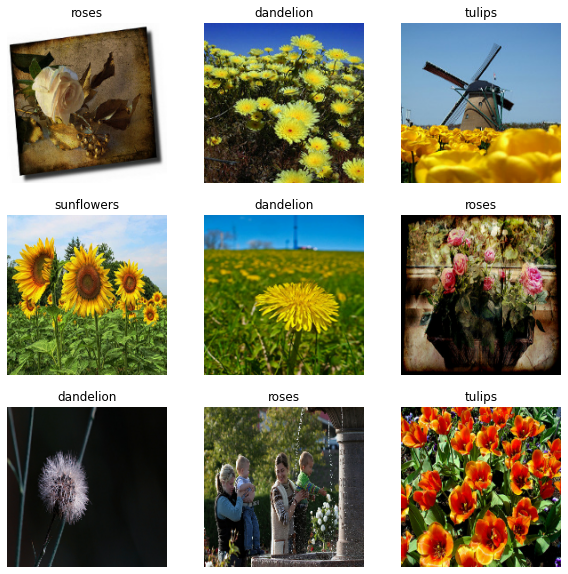

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
normalization_layer = layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9997096


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 87s 930ms/step - loss: 1.3195 - accuracy: 0.4292 - val_loss: 1.1872 - val_accuracy: 0.4891
Epoch 2/10
92/92 [==============================] - 83s 904ms/step - loss: 1.0249 - accuracy: 0.5851 - val_loss: 0.9889 - val_accuracy: 0.6104
Epoch 3/10
92/92 [==============================] - 83s 903ms/step - loss: 0.8653 - accuracy: 0.6666 - val_loss: 0.9501 - val_accuracy: 0.6281
Epoch 4/10
92/92 [==============================] - 83s 903ms/step - loss: 0.6727 - accuracy: 0.7490 - val_loss: 1.0962 - val_accuracy: 0.6281
Epoch 5/10
92/92 [==============================] - 83s 906ms/step - loss: 0.4672 - accuracy: 0.8260 - val_loss: 1.0806 - val_accuracy: 0.6213
Epoch 6/10
92/92 [==============================] - 83s 906ms/step - loss: 0.3173 - accuracy: 0.8832 - val_loss: 1.0555 - val_accuracy: 0.6362
Epoch 7/10
92/92 [==============================] - 84s 910ms/step - loss: 0.1927 - accuracy: 0.9421 - val_loss: 1.2457 - val_accuracy: 0.6417

### active learning 

In [ ]:
from superintendent import ClassLabeller
no_toLabel= 10 
data_toLabel = z
widget = ClassLabeller.from_images(
    features=data_toLabel[:no_toLabel, ...],
    canvas_size=(200, 200),
    options=class_names
    model=history ,
    options=range(10),
    acquisition_function='entropy',
    display_preprocess=lambda x: x.reshape(8, 8)
    
)
widget

SyntaxError: ignored

### storing the data after relbeling 

In [ ]:
widget.new_labels

['roses',
 'roses',
 'roses',
 'roses',
 'sunflowers',
 'roses',
 'roses',
 'roses',
 'roses',
 'sunflowers']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from superintendent import ClassLabeller
digits = load_digits()
data_labeller = ClassLabeller.from_images(
canvas_size=(200, 200),
features=digits.data[:10, :],
model=history ,
options=range(10),
acquisition_function='entropy',
display_preprocess=lambda x: x.reshape(8, 8)

)
data_labeller

SyntaxError: ignored

## EXAMPLE (for refrance)

In [ ]:
digits

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from superintendent import ClassLabeller

digits = load_digits().data.reshape(-1, 8, 8)

widget = ClassLabeller.from_images(
    features=digits[:10, ...],
    canvas_size=(200, 200),
    options=range(10)
    
)
widget



ClassLabeller(children=(HBox(children=(FloatProgress(value=0.0, description='Progress:', max=1.0),)), Box(chil…

### Work through superintend tutorial and implement it for a very easy dataset

##### Getting started: labelling data points


In [ ]:
from superintendent import ClassLabeller

In [ ]:
widget = ClassLabeller(
    features=[
        "First datapoint",
        "Second datapoint",
        "Third datapoint",
    ],
    options=[
        "First option",
        "Second option",
    ],
    allow_freetext=False,
)

In [ ]:
widget
# seems to not show every entry in feature list

ClassLabeller(children=(HBox(children=(FloatProgress(value=0.0, description='Progress:', max=1.0),)), Box(chil…

In [ ]:
widget.new_labels

[None, None, None]

###### load degits  dataset

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits().data[:500, :]

print(digits.shape)

(500, 64)


In [ ]:
type(digits)

numpy.ndarray

These are 8x8 pixel images, but the 64 pixels have been “flattened” into the second array dimension, which we can undo:

In [ ]:
digits = digits.reshape(-1, 8, 8)
print(digits.shape)

(500, 8, 8)


#### Classify images using a convolutional neural network.
TODO: FOr this implement a simple CNN, the Superindent library uses Logisitc regression as an example. Therefore the next would need to be modified.

https://superintendent.readthedocs.io/en/latest/active-learning.html

### Example 2 

### making some madeup Data 

In [ ]:
import random
import string
import pandas as pd

n_rows = 50

example_emails = [
    "Hi John,\nthis is just to say nice work yesterday.\nBest,\nJim",
    "Hi Mike,\nthis is just to say terrible work yesterday.\nBest,\nJim",
]

example_recipients = ["John", "Mike"]

example_timestamps = ["2018-02-01 15:00", "2018-02-01 15:03"]

example_df = pd.DataFrame({
    'email': example_emails,
    'recipient': example_recipients,
    'timestamp': example_timestamps
})

display(example_df)

,email,recipient,timestamp
0,"Hi John,\nthis is just to say nice work yester...",John,2018-02-01 15:00
1,"Hi Mike,\nthis is just to say terrible work ye...",Mike,2018-02-01 15:03


In [ ]:
from IPython.display import display, Markdown

def display_email(row):
    """
    The display function gets passed your data - in the
    case of a dataframe, it gets passed a row - and then
    has to "display" your data in whatever way you want.

    It doesn't need to return anything
    """
    display(Markdown("**To:** " + row["recipient"]))
    display(Markdown("**At:** " + row["timestamp"]))

    display(Markdown(row["email"].replace("\n", "\n\n")))

### Model Pipeline

- We only want to pass the E-Mail text to our model, and to achieve this we can write a small pre-processing function that is applied to both the features and labels whenever a model is fit.

We then can write a model that uses scikit-learn’s feature-vectorizer and applies a logistic regression.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

def preprocessor(x, y):
    # only take Email column, leave everything else
    return x["email"], y


model = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('logistic_regression', LogisticRegression())

])

widget 

In [ ]:
from superintendent import ClassLabeller

widget = ClassLabeller(
    features=example_df,
    model=model,
    model_preprocess=preprocessor,
    display_func=display_email,
    options=['positive', 'negative'],
    acquisition_function='margin'
)

widget

ClassLabeller(children=(HBox(children=(HBox(children=(FloatProgress(value=0.0, description='Progress:', max=1.…

### creating image Dataset 

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image
from keras.preprocessing.image import load_img
import warnings
  


In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
img=Image.open(str(roses[2]))
img1=Image.open(str(roses[5]))
np_img = np.array([img,img1])
#np_img.data.reshape(-1, 8, 8) ### converting images into np array then reshaping it 
np_img


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


array([<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=320x257 at 0x7F1DAB680910>,
       <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x7F1DAB358C10>],
      dtype=object)

In [ ]:
### using keras imge import 
imgkr = load_img(str(roses[2]))
np_imgkr = np.array(imgkr)


In [ ]:
print(np_img.shape)
print(np_imgkr.shape)

(2,)
(257, 320, 3)


In [ ]:
## crete a loop to get all images 

sampl_toLabel=len(roses)*0.1
#roses